### Inference Notebook : Image Classification Task for ML Internship 2023

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import os
import random

In [14]:
data_dir = "C:/Users/camil/Desktop/Image_Classification/EuroSAT/2750"
img_height = 64
img_width = 64

#### 1. Random selection of 20 sample images

In [15]:
subdirs = [f.path for f in os.scandir(data_dir) if f.is_dir()] # list of all subdirectories/classes
labels = [os.path.basename(subdir) for subdir in subdirs] # list of all class names/labels

In [16]:
image_paths = []

for label in labels:
    subdir_path = os.path.join(data_dir, label)
    image_files = os.listdir(subdir_path)
    random.shuffle(image_files)
    for i in range(2): # select 2 random files per subdirectory
        image_path = os.path.join(subdir_path, image_files[i])
        image_paths.append(image_path)
        
image_paths # url list of the 20 random samples

['C:/Users/camil/Desktop/Image_Classification/EuroSAT/2750\\AnnualCrop\\AnnualCrop_444.jpg',
 'C:/Users/camil/Desktop/Image_Classification/EuroSAT/2750\\AnnualCrop\\AnnualCrop_2933.jpg',
 'C:/Users/camil/Desktop/Image_Classification/EuroSAT/2750\\Forest\\Forest_902.jpg',
 'C:/Users/camil/Desktop/Image_Classification/EuroSAT/2750\\Forest\\Forest_1943.jpg',
 'C:/Users/camil/Desktop/Image_Classification/EuroSAT/2750\\HerbaceousVegetation\\HerbaceousVegetation_2660.jpg',
 'C:/Users/camil/Desktop/Image_Classification/EuroSAT/2750\\HerbaceousVegetation\\HerbaceousVegetation_32.jpg',
 'C:/Users/camil/Desktop/Image_Classification/EuroSAT/2750\\Highway\\Highway_498.jpg',
 'C:/Users/camil/Desktop/Image_Classification/EuroSAT/2750\\Highway\\Highway_473.jpg',
 'C:/Users/camil/Desktop/Image_Classification/EuroSAT/2750\\Industrial\\Industrial_2303.jpg',
 'C:/Users/camil/Desktop/Image_Classification/EuroSAT/2750\\Industrial\\Industrial_315.jpg',
 'C:/Users/camil/Desktop/Image_Classification/EuroSAT/2

#### 2. Load the previously saved model

In [17]:
my_model = tf.keras.models.load_model('saved_model/my_model')

#### 3. Model summary

In [18]:
# Check its architecture
my_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_2 (Sequential)   (None, 64, 64, 3)         0         
                                                                 
 rescaling_1 (Rescaling)     (None, 64, 64, 3)         0         
                                                                 
 conv2d_5 (Conv2D)           (None, 64, 64, 16)        448       
                                                                 
 conv2d_6 (Conv2D)           (None, 64, 64, 16)        2320      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 32, 32, 16)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 32)        4640      
                                                      

#### 4. Model predictions on samples

1/1 [==============================] - 0s 218ms/step
This image most likely belongs to AnnualCrop with a 100.00 percent confidence.
1/1 [==============================] - 0s 46ms/step
This image most likely belongs to AnnualCrop with a 89.74 percent confidence.
1/1 [==============================] - 0s 33ms/step
This image most likely belongs to Forest with a 99.99 percent confidence.
1/1 [==============================] - 0s 34ms/step
This image most likely belongs to Forest with a 97.17 percent confidence.
1/1 [==============================] - 0s 29ms/step
This image most likely belongs to PermanentCrop with a 49.29 percent confidence.
1/1 [==============================] - 0s 31ms/step
This image most likely belongs to HerbaceousVegetation with a 95.75 percent confidence.
1/1 [==============================] - 0s 29ms/step
This image most likely belongs to Highway with a 99.78 percent confidence.
1/1 [==============================] - 0s 29ms/step
This image most likely belongs to 

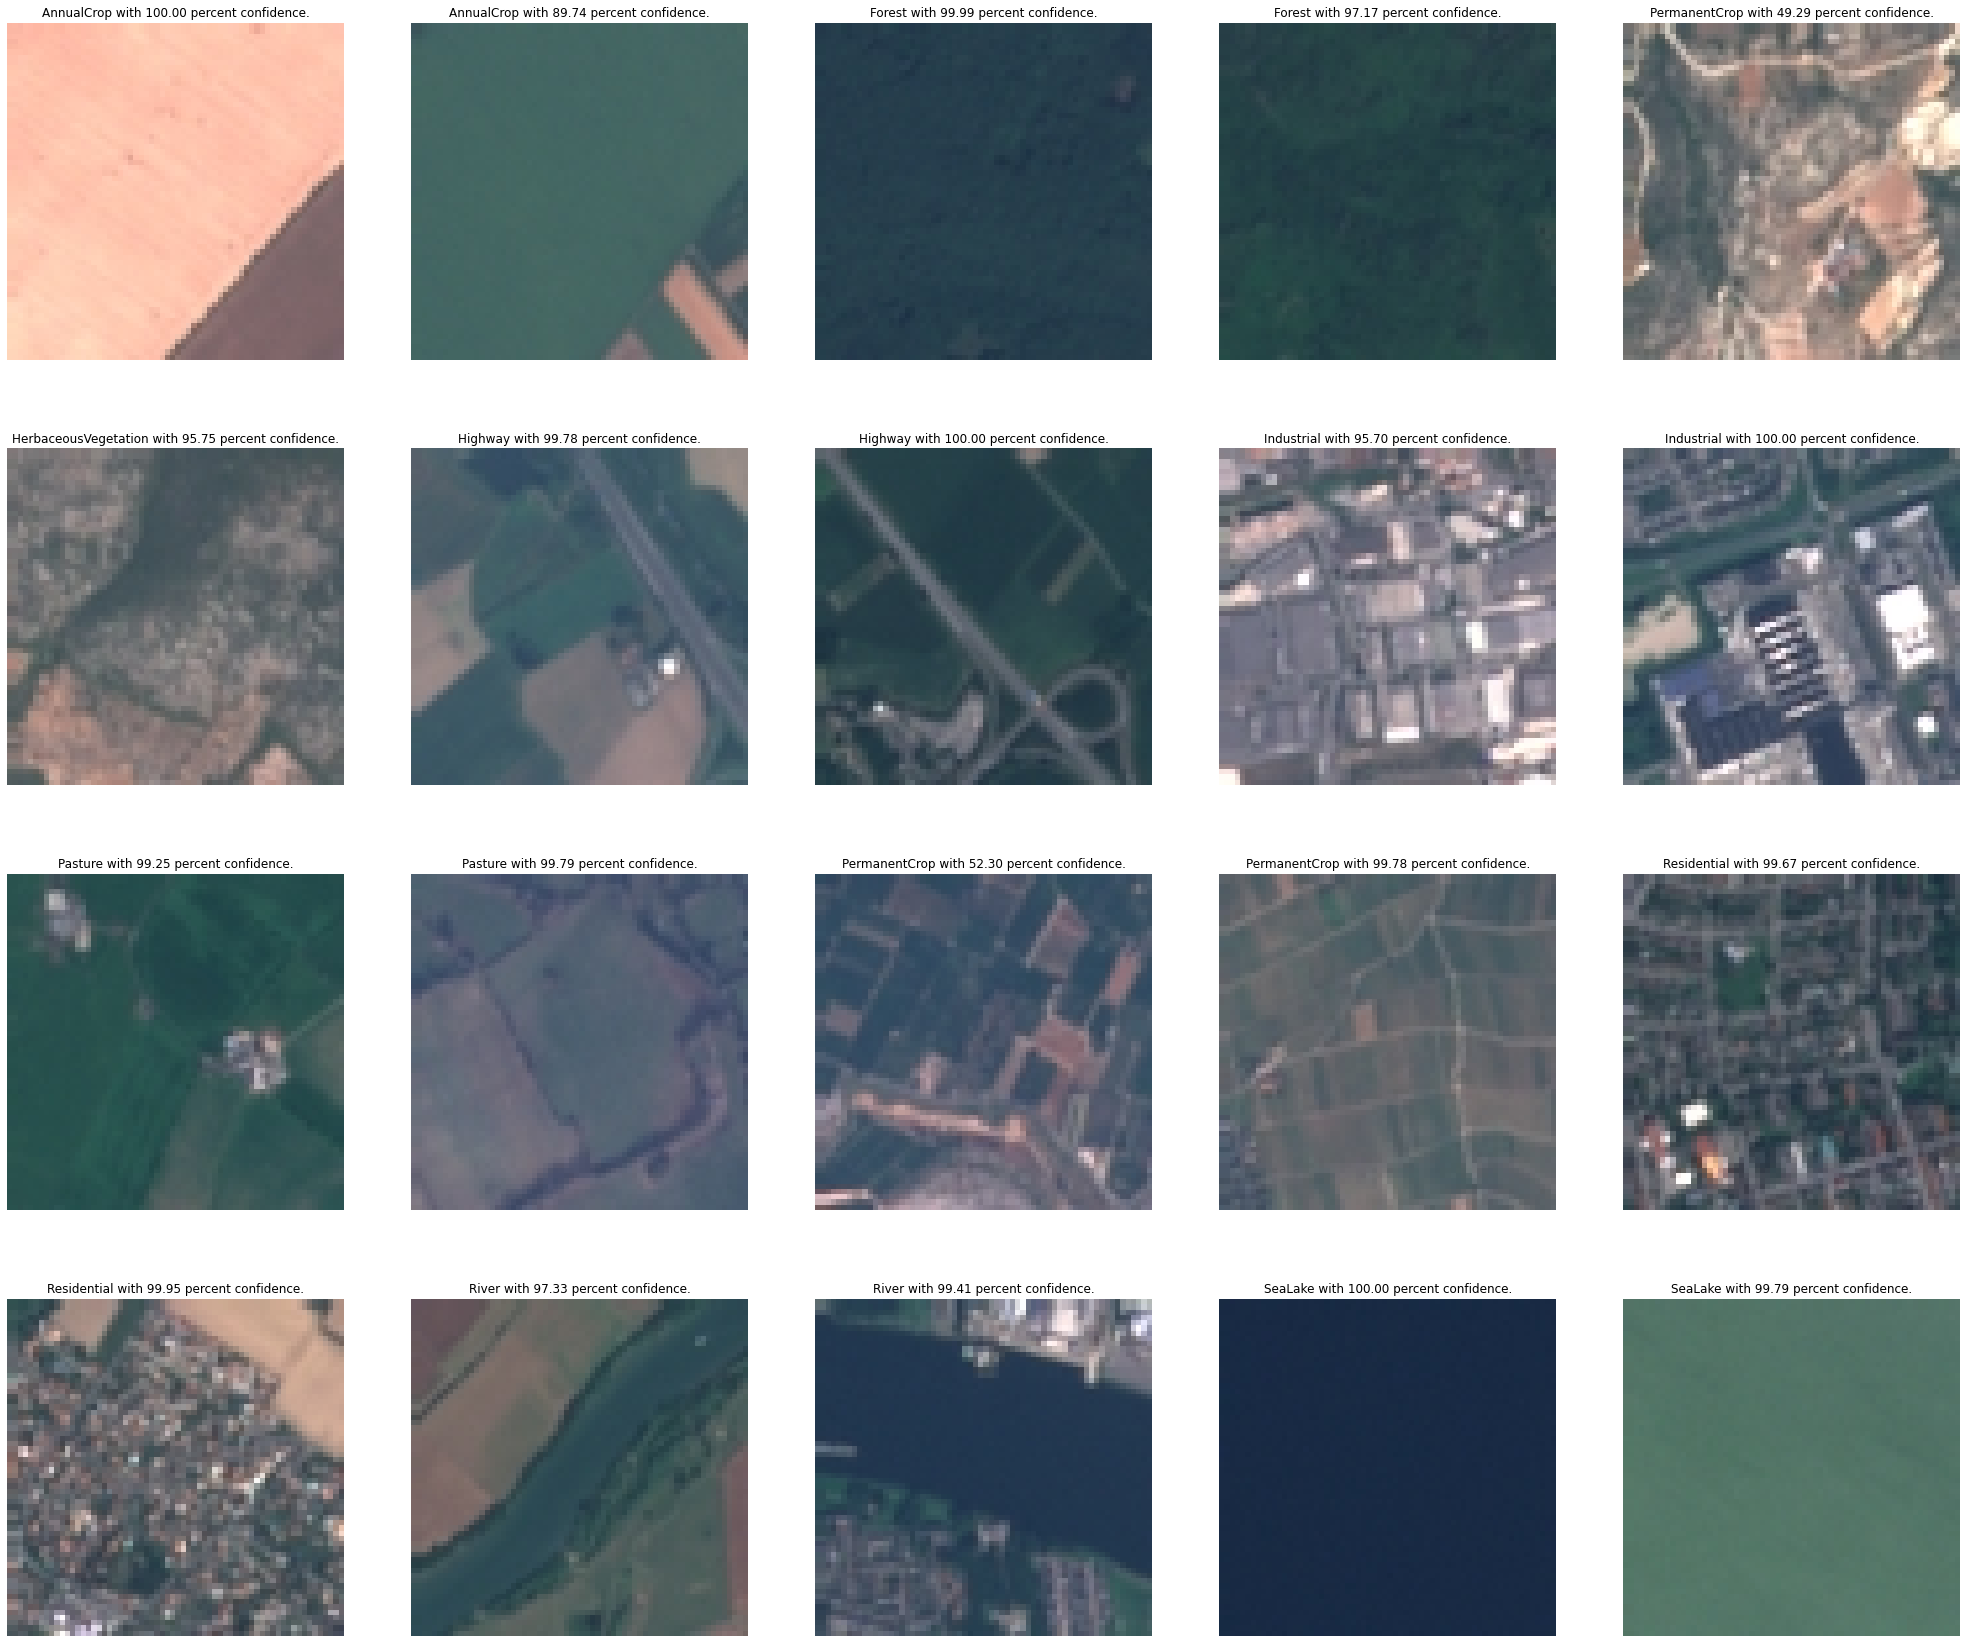

In [19]:
plt.figure(figsize=(35,30))

for i in range(len(image_paths)):
    
    # load 1 image with image path
    img = tf.keras.utils.load_img(
        image_paths[i], target_size=(img_height, img_width)
    )

    # conversion from img to NDArray (which is compatible for the model)
    img_array = tf.keras.utils.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0) # Create a batch of 1 image

    predictions = my_model.predict(img_array)
    score = tf.nn.softmax(predictions[0]) # convert the prediction in probabilites 
        
    res = "This image most likely belongs to {} with a {:.2f} percent confidence.".format(labels[np.argmax(score)], 100 * np.max(score))
    print(res)

    # display all the images with their classification results
    ax = plt.subplot(4, 5, i + 1)
    plt.imshow(img)
    title = "{} with {:.2f} percent confidence".format(labels[np.argmax(score)], 100 * np.max(score))
    plt.title(title)
    ax.axis('off')